In [1]:
from re import S
import numpy as np
import matplotlib.pyplot as plt
import arepo
import h5py as h5
import matplotlib as mpl
from matplotlib import rc
import glob
from tqdm import tqdm
from scipy.signal import savgol_filter
from numba import njit
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

snap_path = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'
fourier_path = '/n/home01/abeane/starbar/plots/fourier_sphere/data/'
bprop_path = '/n/home01/abeane/starbar/plots/bar_prop/data/'

tb_c = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f',
        '#edc948', '#b07aa1', '#ff9da7', '#9c755f', '#bab0ac']

# names
Nbody = 'Nbody'
phS2R35 = 'phantom-vacuum-Sg20-Rc3.5'

lvl = 'lvl3'

def read_snap(idx, name, lvl, parttype=[2, 3, 4], fields=['Coordinates', 'Masses']):
    sn = arepo.Snapshot(snap_path+name+'/'+lvl+'/output', idx, combineFiles=True, parttype=parttype,
                        fields=fields)
    return sn

In [8]:
sn = read_snap(0
               , phS2R35, lvl, parttype=None, fields=None)

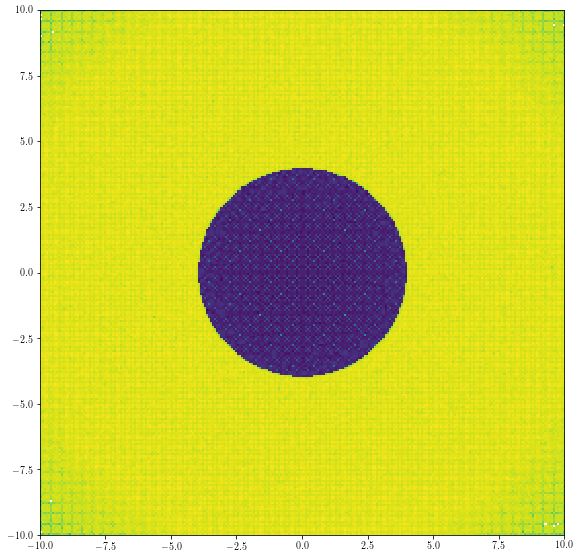

In [10]:
center = np.array([200., 200., 200.])
pos = sn.part0.pos.value - center
mass = sn.part0.mass.value

nres = 256

range_xy = [[-10, 10], [-10, 10]]

x = pos[:,0]
y = pos[:,1]
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy, weights=mass)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.imshow(heatmap_xy.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax.set_aspect('equal')
fig.tight_layout()

plt.show()
